In [6]:
import pandas as pd
from numpy import median, array
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [26]:
# Load in data
results = pd.read_csv('pilot_results.csv')
results = results.loc[results.model != 'transh'].loc[results.model != 'rotate'] # Transh and rotate only ran on UMLS, inflating their perfomance
results = results.loc[results.model != 'reciprocal_relations_model'] # RR model not relevant to study

# Grab median scores for KGE methods
data = pd.DataFrame(
    [[model, median(subdf.metric)] for model, subdf in results.groupby(['model'])],
    columns=['method', 'median_score']
)

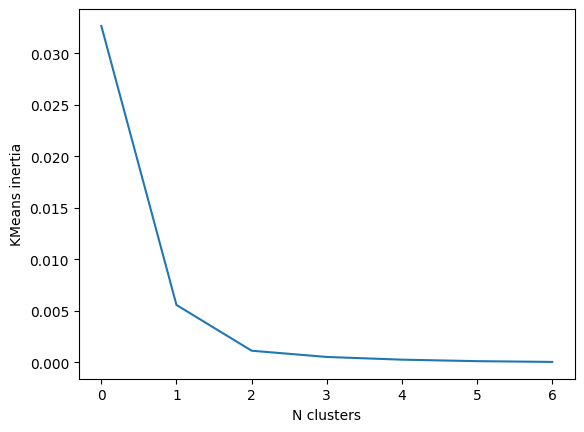

In [27]:
# Iteratively run KMeans and plot to use elbow method for K selection 
errors = []
for n_clusters in range(1, len(data)):
    clusterer = KMeans(n_clusters)
    clusters = clusterer.fit(array(data.median_score).reshape(-1, 1))
    errors.append(clusters.inertia_)
    
plt.plot(errors)
plt.ylabel('KMeans inertia')
plt.xlabel('N clusters')
plt.show()


The elbow method suggests the optimal number of clusters is 2.

In [28]:
# Fit optimal clustering
clusterer = KMeans(2)
clusters = clusterer.fit(array(data.median_score).reshape(-1, 1))

# Save data 
data['cluster_label'] = clusters.labels_
data = data.sort_values('median_score', ascending=False)
data.to_csv('method_clustering_results.csv', index=False)
data

,method,median_score,cluster_label
3,distmult,0.338211,0
0,complex,0.330638,0
6,simple,0.318314,0
1,conve,0.301287,0
5,rescal,0.275863,0
4,relational_tucker3,0.252939,0
2,cp,0.174593,1
7,transe,0.162401,1


We take the top performing cluster as the methods to use in this study. CP and TransE will therefore be eliminated from the study, along with all models that were excluded from the previous one (TransH, RotatE, and Transformer/HittER).